### Проект: использование средств Python для расчёта и визуализации статистических свойств выборки

1. Выборка — задача многоклассовой классификации ирисов Фишера.

In [1]:
from sklearn import datasets
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

iris = datasets.load_iris()

In [2]:
dataset = iris['data']

In [3]:
target = iris['target']

In [4]:
iris_data = pd.DataFrame(np.c_[dataset, target], columns=iris['feature_names'] + ['species'])

Посчитать основные характеристики выборки по каждому признаку:

среднее;

дисперсия;

минимум;

максимум;

размах.

In [5]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [11]:
iris_data['species'].value_counts()

0.0    50
1.0    50
2.0    50
Name: species, dtype: int64

In [12]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
describe = iris_data.describe().T
describe['range'] = describe['max'] - describe['min']
describe['D'] = iris_data.var()
describe.drop(columns=['count', 'std', '25%', '50%', '75%'], inplace=True)
describe = describe.reindex(['mean', 'D', 'min', 'max', 'range'], axis=1)
describe

,mean,D,min,max,range
sepal length (cm),5.843333,0.685694,4.3,7.9,3.6
sepal width (cm),3.057333,0.189979,2.0,4.4,2.4
petal length (cm),3.758000,3.116278,1.0,6.9,5.9
petal width (cm),1.199333,0.581006,0.1,2.5,2.4
species,1.000000,0.671141,0.0,2.0,2.0


2. Визуализировать распределения признаков посредством seaborn.

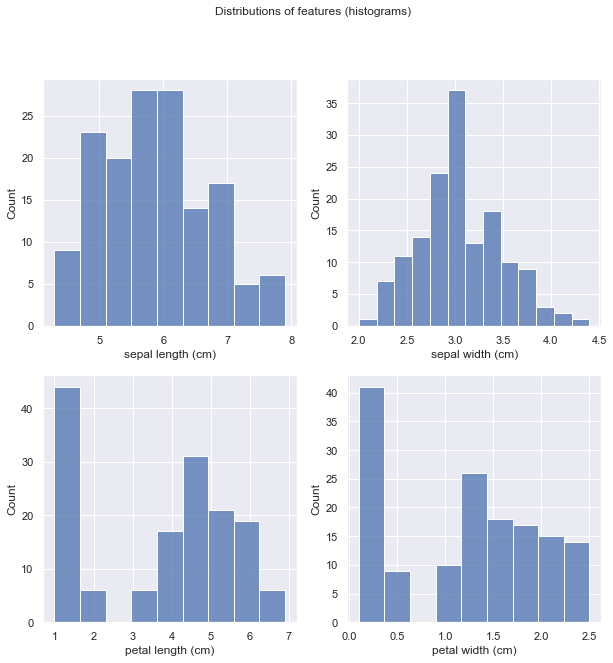

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Distributions of features (histograms)')

sns.histplot(ax=axs[0, 0], data=iris_data, x='sepal length (cm)')
sns.histplot(ax=axs[0, 1], data=iris_data, x='sepal width (cm)')
sns.histplot(ax=axs[1, 0], data=iris_data, x='petal length (cm)')
sns.histplot(ax=axs[1, 1], data=iris_data, x='petal width (cm)')
plt.show()

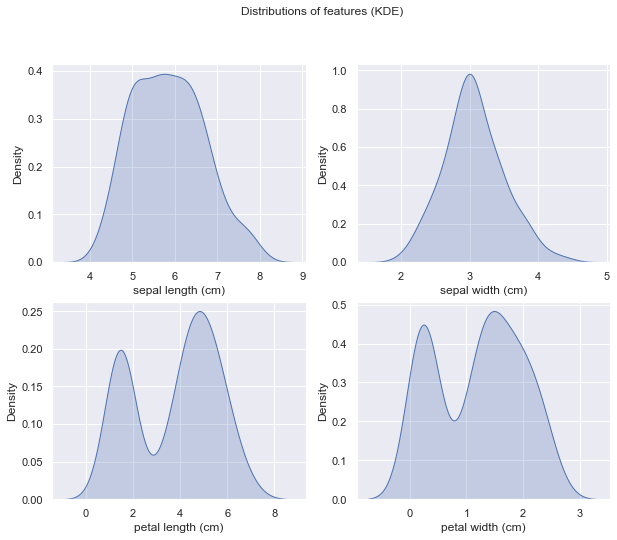

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Distributions of features (KDE)')

sns.kdeplot(ax=axs[0, 0], data=iris_data, x='sepal length (cm)', fill=True)
sns.kdeplot(ax=axs[0, 1], data=iris_data, x='sepal width (cm)', fill=True)
sns.kdeplot(ax=axs[1, 0], data=iris_data, x='petal length (cm)', fill=True)
sns.kdeplot(ax=axs[1, 1], data=iris_data, x='petal width (cm)', fill=True)
plt.show()

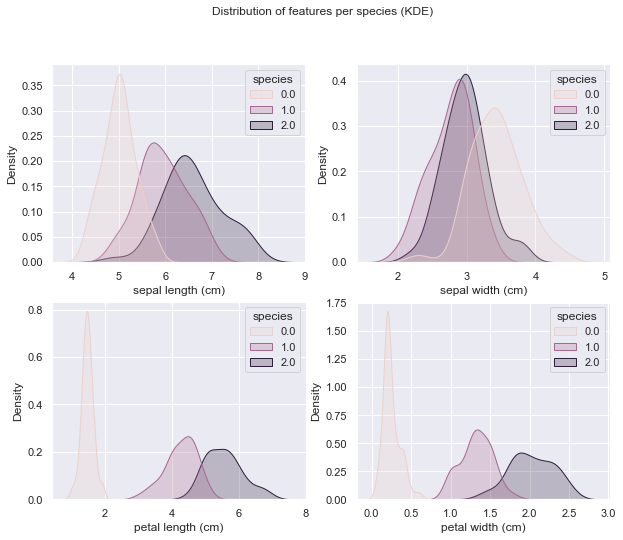

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Distribution of features per species (KDE)')

sns.kdeplot(ax=axs[0, 0], data=iris_data, x='sepal length (cm)', hue='species', fill=True)
sns.kdeplot(ax=axs[0, 1], data=iris_data, x='sepal width (cm)', hue='species', fill=True)
sns.kdeplot(ax=axs[1, 0], data=iris_data, x='petal length (cm)', hue='species', fill=True)
sns.kdeplot(ax=axs[1, 1], data=iris_data, x='petal width (cm)', hue='species', fill=True)
plt.show()

3. Посчитать и визуализировать корреляционную матрицу.

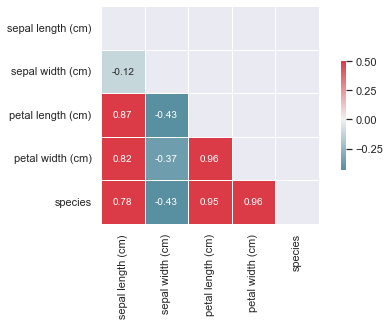

In [19]:
corr = iris_data.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 4))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5},
            cbar=True, fmt='.2f', annot_kws={'size': 10}, annot=True)
plt.show()

4. Проверить гипотезу о нормальности распределения для признаков 1 и 2.

In [20]:
list(iris_data.columns)


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'species']

#### 1) sepal length (cm)

In [21]:
stat, p = stats.shapiro(iris_data['sepal length (cm)'])
print(f'Statistic: {stat:.4f}; Pvalue: {p:.4f}')

Statistic: 0.9761; Pvalue: 0.0102


In [22]:
alpha = 0.05

In [23]:
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


#### 2) sepal width (cm)

In [24]:
stat, p = stats.shapiro(iris_data['sepal width (cm)'])
print(f'Statistic: {stat:.4f}; Pvalue: {p:.4f}')

Statistic: 0.9849; Pvalue: 0.1011


In [25]:
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)


5. Произвести расчёт статистик из пункта 1 для каждого значения таргета (группировка).

In [26]:
gr_sp = iris_data.groupby('species')

sp_dict = {
    'Class_0': {},
    'Class_1': {},
    'Class_2': {}
}

result = {}

for col in list(iris_data.columns)[:-1]:
    statistics = [gr_sp[col].mean(),
                  gr_sp[col].var(),
                  gr_sp[col].min(),
                  gr_sp[col].max(),
                  gr_sp[col].max() - gr_sp[col].min()]
    
    for i in range(len(gr_sp)):
        sp_dict[f'Class_{i}'][col] = []
        for stat in statistics:
            sp_dict[f'Class_{i}'][col].append(stat[i])

print(sp_dict)

for data in sp_dict:
    result[data] = pd.DataFrame(sp_dict[data], columns=list(iris_data.columns)[:-1], index=['mean', 'D', 'min', 'max', 'range'])

{'Class_0': {'sepal length (cm)': [5.006, 0.12424897959183673, 4.3, 5.8, 1.5], 'sepal width (cm)': [3.428, 0.1436897959183673, 2.3, 4.4, 2.1000000000000005], 'petal length (cm)': [1.462, 0.030159183673469397, 1.0, 1.9, 0.8999999999999999], 'petal width (cm)': [0.24600000000000002, 0.01110612244897959, 0.1, 0.6, 0.5]}, 'Class_1': {'sepal length (cm)': [5.936, 0.26643265306122454, 4.9, 7.0, 2.0999999999999996], 'sepal width (cm)': [2.77, 0.09846938775510206, 2.0, 3.4, 1.4], 'petal length (cm)': [4.26, 0.22081632653061217, 3.0, 5.1, 2.0999999999999996], 'petal width (cm)': [1.3259999999999998, 0.03910612244897961, 1.0, 1.8, 0.8]}, 'Class_2': {'sepal length (cm)': [6.587999999999999, 0.4043428571428571, 4.9, 7.9, 3.0], 'sepal width (cm)': [2.9739999999999998, 0.1040040816326531, 2.2, 3.8, 1.5999999999999996], 'petal length (cm)': [5.5520000000000005, 0.30458775510204095, 4.5, 6.9, 2.4000000000000004], 'petal width (cm)': [2.026, 0.07543265306122451, 1.4, 2.5, 1.1]}}


In [27]:
print('<<< Class_0 >>>')
result['Class_0'].T

<<< Class_0 >>>


,mean,D,min,max,range
sepal length (cm),5.006,0.124249,4.3,5.8,1.5
sepal width (cm),3.428,0.143690,2.3,4.4,2.1
petal length (cm),1.462,0.030159,1.0,1.9,0.9
petal width (cm),0.246,0.011106,0.1,0.6,0.5


In [28]:
print('<<< Class_1 >>>')
result['Class_1'].T

<<< Class_1 >>>


,mean,D,min,max,range
sepal length (cm),5.936,0.266433,4.9,7.0,2.1
sepal width (cm),2.770,0.098469,2.0,3.4,1.4
petal length (cm),4.260,0.220816,3.0,5.1,2.1
petal width (cm),1.326,0.039106,1.0,1.8,0.8


In [29]:
print('<<< Class_2 >>>')
result['Class_2'].T

<<< Class_2 >>>


,mean,D,min,max,range
sepal length (cm),6.588,0.404343,4.9,7.9,3.0
sepal width (cm),2.974,0.104004,2.2,3.8,1.6
petal length (cm),5.552,0.304588,4.5,6.9,2.4
petal width (cm),2.026,0.075433,1.4,2.5,1.1


## 6. Написать функцию, автоматизирующую EDA.

In [33]:
def auto_eda(data):
    # Show 5 first strings
    print(data.head())
    
    # Show statistics (mean, D, min, max, range)
    describe = data.describe().T
    describe['range'] = describe['max'] - describe['min']
    describe['D'] = data.var()
    describe.drop(columns=['count', 'std', '25%', '50%', '75%'], inplace=True)
    describe = describe.reindex(['mean', 'D', 'min', 'max', 'range'], axis=1)
    print(describe)
    
    # Distribution of features
    fig, axs = plt.subplots(2, 2, figsize=(11, 6))
    fig.suptitle('Distributions of features (histograms)')

    sns.histplot(ax=axs[0, 0], data=data, x='sepal length (cm)')
    sns.histplot(ax=axs[0, 1], data=data, x='sepal width (cm)')
    sns.histplot(ax=axs[1, 0], data=data, x='petal length (cm)')
    sns.histplot(ax=axs[1, 1], data=data, x='petal width (cm)')
    plt.show()
    
    # Distributions of features (KDE)
    fig, axs = plt.subplots(2, 2, figsize=(11, 6))
    fig.suptitle('Distributions of features (KDE)')

    sns.kdeplot(ax=axs[0, 0], data=data, x='sepal length (cm)', fill=True)
    sns.kdeplot(ax=axs[0, 1], data=data, x='sepal width (cm)', fill=True)
    sns.kdeplot(ax=axs[1, 0], data=data, x='petal length (cm)', fill=True)
    sns.kdeplot(ax=axs[1, 1], data=data, x='petal width (cm)', fill=True)
    plt.show()
    
    # Distribution of features per species (KDE)
    fig, axs = plt.subplots(2, 2, figsize=(11, 6))
    fig.suptitle('Distribution of features per species (KDE)')

    sns.kdeplot(ax=axs[0, 0], data=data, x='sepal length (cm)', hue='species', fill=True)
    sns.kdeplot(ax=axs[0, 1], data=data, x='sepal width (cm)', hue='species', fill=True)
    sns.kdeplot(ax=axs[1, 0], data=data, x='petal length (cm)', hue='species', fill=True)
    sns.kdeplot(ax=axs[1, 1], data=data, x='petal width (cm)', hue='species', fill=True)
    plt.show()
    
    # Correlation
    corr = data.corr()
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(8, 4))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5},
                cbar=True, fmt='.2f', annot_kws={'size': 10}, annot=True)
    plt.show()
    
    # Checking for normality (features 1 & 2)
    ## 1) sepal length (cm)
    stat, p = stats.shapiro(data['sepal length (cm)'])
    print(f'Statistic: {stat:.4f}; Pvalue: {p:.4f}')
    
    alpha = 0.05
    
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
    
    ## 2) sepal width (cm)
    stat, p = stats.shapiro(data['sepal width (cm)'])
    print(f'\nStatistic: {stat:.4f}; Pvalue: {p:.4f}')
    
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
        
    
    # Target statistics
    gr_sp = data.groupby('species')

    sp_dict = {
        'Class_0': {},
        'Class_1': {},
        'Class_2': {}
    }

    result = {}

    for col in list(data.columns)[:-1]:
        statistics = [gr_sp[col].mean(),
                      gr_sp[col].var(),
                      gr_sp[col].min(),
                      gr_sp[col].max(),
                      gr_sp[col].max() - gr_sp[col].min()]

        for i in range(len(gr_sp)):
            sp_dict[f'Class_{i}'][col] = []
            for stat in statistics:
                sp_dict[f'Class_{i}'][col].append(stat[i])

    for sdata in sp_dict:
        result[sdata] = pd.DataFrame(sp_dict[sdata], columns=list(data.columns)[:-1], index=['mean', 'D', 'min', 'max', 'range'])
    
    ## Class_0
    print('\n<<< Class_0 >>>')
    print(result['Class_0'].T, '\n')
    
    ## Class_1
    print('<<< Class_1 >>>')
    print(result['Class_1'].T, '\n')
    
    ## Class_2
    print('<<< Class_2 >>>')
    print(result['Class_2'].T, '\n')

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
                       mean         D  min  max  range
sepal length (cm)  5.843333  0.685694  4.3  7.9    3.6
sepal width (cm)   3.057333  0.189979  2.0  4.4    2.4
petal length (cm)  3.758000  3.116278  1.0  6.9    5.9
petal width (cm)   1.199333  0.581006  0.1  2.5    2.4
species            1.000000  0.671141  0.0  2.0    2.0


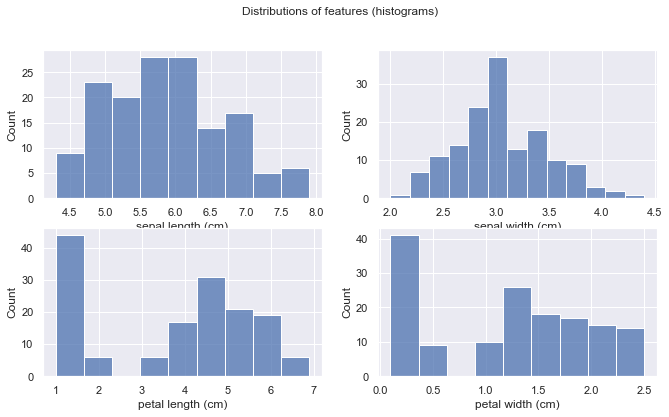

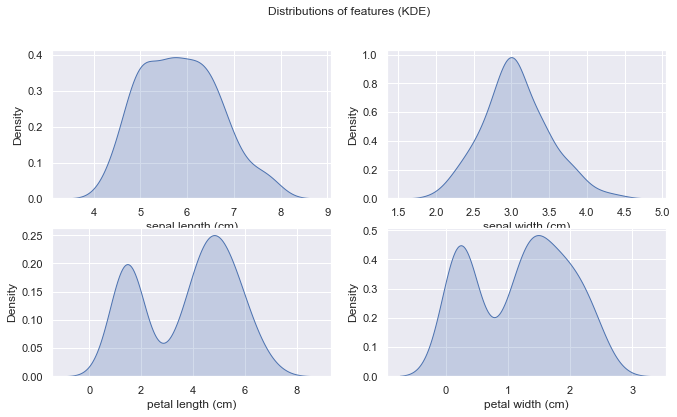

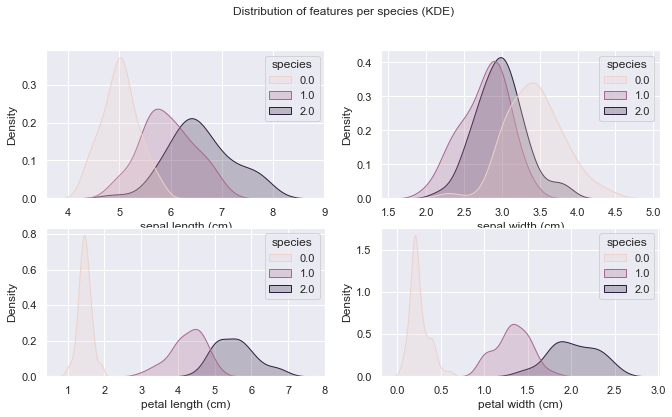

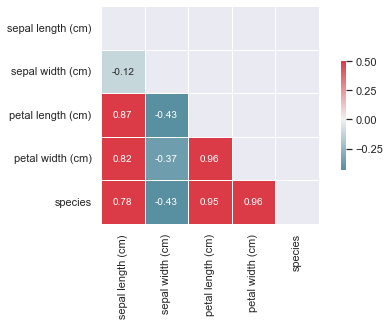

Statistic: 0.9761; Pvalue: 0.0102
Sample does not look Gaussian (reject H0)

Statistic: 0.9849; Pvalue: 0.1011
Sample looks Gaussian (fail to reject H0)

<<< Class_0 >>>
                    mean         D  min  max  range
sepal length (cm)  5.006  0.124249  4.3  5.8    1.5
sepal width (cm)   3.428  0.143690  2.3  4.4    2.1
petal length (cm)  1.462  0.030159  1.0  1.9    0.9
petal width (cm)   0.246  0.011106  0.1  0.6    0.5 

<<< Class_1 >>>
                    mean         D  min  max  range
sepal length (cm)  5.936  0.266433  4.9  7.0    2.1
sepal width (cm)   2.770  0.098469  2.0  3.4    1.4
petal length (cm)  4.260  0.220816  3.0  5.1    2.1
petal width (cm)   1.326  0.039106  1.0  1.8    0.8 

<<< Class_2 >>>
                    mean         D  min  max  range
sepal length (cm)  6.588  0.404343  4.9  7.9    3.0
sepal width (cm)   2.974  0.104004  2.2  3.8    1.6
petal length (cm)  5.552  0.304588  4.5  6.9    2.4
petal width (cm)   2.026  0.075433  1.4  2.5    1.1 



In [34]:
auto_eda(iris_data)